# Esercitazione fisica computazionale gruppo A 04/03/2025

## Sistema Internazionale di Unità di Misura (SI)

Il **Sistema Internazionale di Unità di Misura (SI)** è il sistema metrico moderno utilizzato a livello globale nella scienza e nell'industria. È basato su sette **unità di base** indipendenti, da cui derivano tutte le altre unità fisiche. Le unità SI sono definite in termini di costanti fondamentali della fisica, garantendo precisione e riproducibilità.

Le sette unità fondamentali sono:

- **Metro (m)** per la lunghezza  
- **Chilogrammo (kg)** per la massa  
- **Secondo (s)** per il tempo  
- **Ampere (A)** per la corrente elettrica  
- **Kelvin (K)** per la temperatura termodinamica  
- **Mole (mol)** per la quantità di sostanza  
- **Candela (cd)** per l'intensità luminosa  

Da queste si possono derivare altre unità, come il Newton (N), il Joule (J), il Watt (W) e i Volts (V).

| Grandezza Fisica       | Unità SI        | Dimensioni             |
|:----------------------:|:---------------:|:----------------------:|
| Lunghezza              | metro (m)       | $[L]$                  |
| Massa                  | chilogrammo (kg)| $[M]$                  |
| Tempo                  | secondo (s)     | $[t]$                  |
| Corrente elettrica     | Ampere (A)      | $[I]$                  |
| Temperatura            | Kelvin (K)      | $[T]$                  |
| Forza                  | Newton (N)      | $[M L t^{-2}]$         |
| Energia                | Joule (J)       | $[M L^2 t^{-2}]$       |
| Potenza                | Watt (W)        | $[M L^2 t^{-3}]$       |
| Diff. di potenziale    | Volt (V)        | $[M L^2 t^{-3}$<br>$I^{-1}]$              |



Questo sistema fornisce una base coerente e universale per le misurazioni **in tutte le discipline scientifiche**.

### Esercizio 1 - Conversioni di unità di misura (1)
Convertiamo le seguenti misurazioni in unità del SI: 
- esprimiamo una velocità di 1 km/h in m/s
- una pressione di 1 atm in Pascal (1 atm equivale alla pressione sul livello del mare) 
- la temperatura media della superficie terrestre è 15 °C, esprimiamo il valore in Kelvin
- un'energia di 1 caloria in Joule (1 caloria rappresenta l'energia necessaria per innalzare di 1 °C la temperatura di 1 g di acqua distillata alla pressione atmosferica)

### Esercizio 2 - Conversioni di unità di misura (2)
È più veloce un'automobile che viaggia a 100 km/h o una raffica di vento a 30 m/s?

### Esercizio 3 - Costruzione di un semplice modello con l'analisi dimensionale (1)
L'accelerazione di gravità $g$ sulla superficie di un pianeta dipende dal raggio $R$, dalla densità media $\rho$ e da una costante $G$, che ha le dimensioni di $m^3\;kg^{-1}\; s^{-2}$. Determina la dipendenza dimensionale di $g$ in funzione di  $R$, $\rho$ e $G$, usando solo l'analisi dimensionale.

### Esercizio 4 - Costruzione di un semplice modello con l'analisi dimensionale (2)
Se usassimo i parametri medi della terra quale sarebbe il valore dell'acelerazione di gravità $g$? 
$M_t$ = massa della Terra = $5.97\times 10^{27}$ grammi, $R_t$ = raggio medio della terra = $6378$ km

### Esercizio 4 - Verifica dimensionale di equazioni fisiche
Il tempo caratteristico di oscillazione di un pendolo $\tau$ dipende solamente dalla lunghezza del pendolo $\ell$ e dal valore di $g$. Quale tra le seguenti relazioni è valida dimensionalmente?
$$(a): \tau = 2\pi\sqrt{\frac{g}{\ell}} \;\;\;\; (b): \tau = 2\pi\sqrt{\frac{\ell}{g}} \;\;\;\; (c): \tau = 2\pi{{\ell g}}$$

### Esercizio 6 - Programma per il calcolo del periodo di un pendolo al variare di $g$ ed $\ell$ (2)

Nel programma vogliamo calcolare il valore del periodo $\tau$ di un pendolo e graficarne l'andamento al variare di $g$ (accelerazione di gravità) e della sua lunghezza $\ell$.
In particolare, sono stati considerati i valori di $g$ per relativi a tre distinti corpi celesti: Terra, Luna e Giove. Con i risultati ottenuti costruiamo due grafici: il primo grafico mostra l'andamento del periodo sulla Terra per lunghezze $\ell$ variabili da 10 mm a 10 m, mentre il secondo confronta il periodo sui diversi pianeti per ctre lunghezze: 100 cm, 200 cm e 300 cm, utilizzando simboli differenti per ciascuna lunghezza.

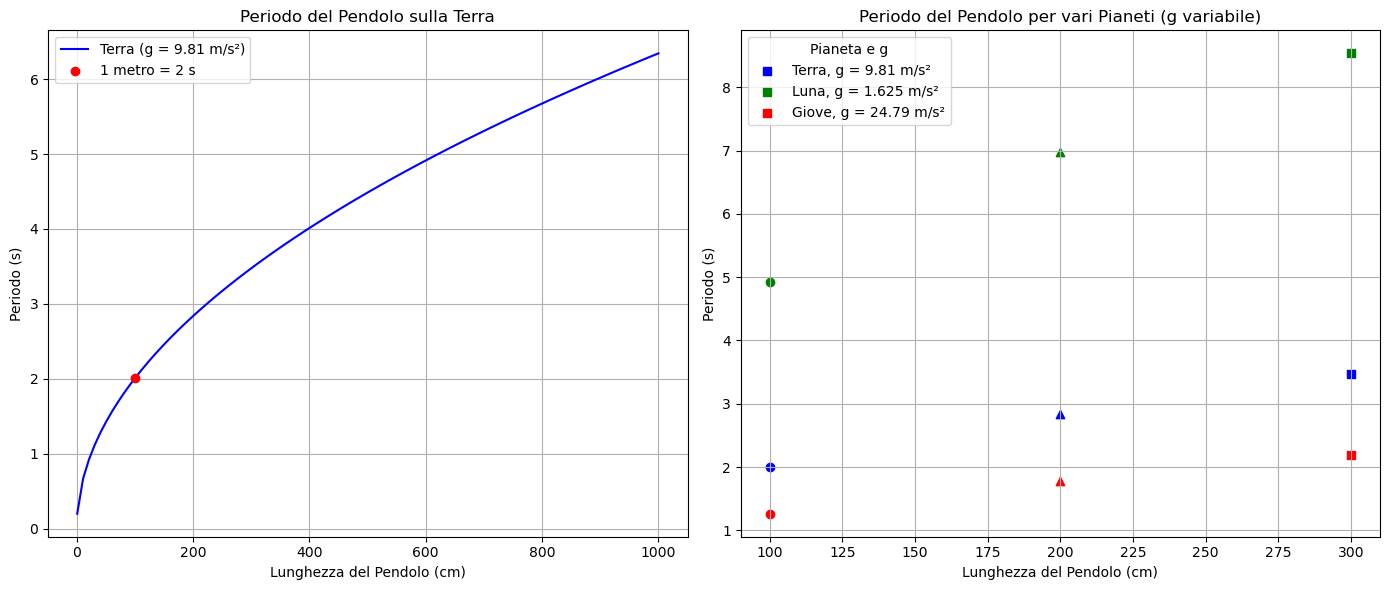

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pendulum_period_multiple(g_values=[9.81, 1.625, 24.79], l_values=[100, 200, 300], num_points=100):
    """
    Funzione per tracciare il periodo del pendolo in funzione della lunghezza
    con un grafico per la Terra (con lunghezze da 10mm a 10m) a sinistra
    e un grafico per i vari pianeti (Terra, Luna, Giove) a destra con lunghezze fisse.
    
    Args:
    - g_values (list): lista di valori di accelerazione di gravità (in m/s^2)
    - l_values (list): lista di lunghezze del pendolo (in centimetri)
    - num_points (int): numero di punti per la grafica
    """
    
    # Creare il grafico con due sotto-grafici (due plot affiancati)
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Pianeti per la legenda
    planet_names = {9.81: 'Terra', 1.625: 'Luna', 24.79: 'Giove'}
    
    # Mappa dei colori per i pianeti
    color_map = {9.81: 'blue', 1.625: 'green', 24.79: 'red'}
    
    # Mappa dei simboli per le lunghezze
    marker_map = {100: 'o', 200: '^', 300: 's'}  # Cerchio per 100 cm, Triangolo per 200 cm, Quadrato per 300 cm
    
    # Grafico a sinistra: Terra con variazione lineare di lunghezza da 10mm a 10m
    # Variazione della lunghezza da 10mm a 10m (da 0.01m a 10m)
    l_values_terra = np.linspace(0.01, 10, num_points)  # Lunghezze da 0.01m a 10m
    g_terra = 9.81  # Gravitazione sulla Terra
    
    # Calcolare i periodi corrispondenti
    T_values_terra = 2 * np.pi * np.sqrt(l_values_terra / g_terra)
    
    # Tracciare il grafico per la Terra
    axs[0].plot(l_values_terra * 100, T_values_terra, color='blue', label='Terra (g = 9.81 m/s²)', linestyle='-', marker='none')
    
    # Aggiungere un singolo punto per la lunghezza di 1 metro
    l_single = 1  # 1 metro
    T_single = 2 * np.pi * np.sqrt(l_single / g_terra)
    axs[0].scatter(l_single * 100, T_single, color='red', zorder=5, label="1 metro = 2 s")
    
    # Impostazioni per il grafico a sinistra (Terra)
    axs[0].set_title("Periodo del Pendolo sulla Terra")
    axs[0].set_xlabel('Lunghezza del Pendolo (cm)')
    axs[0].set_ylabel('Periodo (s)')
    axs[0].grid(True)
    axs[0].legend(loc="upper left")
    
    # Grafico a destra: Pianeti con valori di g variabili (Terra, Luna, Giove)
    for g in g_values:
        for l in l_values:
            # Convertire la lunghezza da centimetri a metri
            l_in_meters = l / 100  # lunghezza in metri
            
            # Calcolare il periodo T in base alla formula T = 2*pi*sqrt(l/g)
            T_values = 2 * np.pi * np.sqrt(l_in_meters / g)
            
            # Prendere il colore per il pianeta
            color = color_map[g]  
            marker = marker_map[l]  # Prendere il simbolo per la lunghezza
            label = f'{planet_names[g]}, g = {g} m/s²'  # Etichetta con g e nome del pianeta
            
            # Mostrare il simbolo colorato per la lunghezza
            axs[1].scatter(l, T_values, color=color, marker=marker, label=label)
    
    # Impostazioni per il grafico a destra (Pianeti)
    axs[1].set_title("Periodo del Pendolo per vari Pianeti (g variabile)")
    axs[1].set_xlabel('Lunghezza del Pendolo (cm)')
    axs[1].set_ylabel('Periodo (s)')
    axs[1].grid(True)
    
    # Gestire la legenda per evitare duplicati nel grafico a destra
    handles, labels = axs[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[1].legend(by_label.values(), by_label.keys(), title="Pianeta e g", loc="upper left")
    
    # Mostrare il grafico
    plt.tight_layout()  # Ottimizzare il layout
    plt.show()

# Esegui la funzione con i valori di accelerazione di gravità per Terra, Luna e Giove
g_values = [9.81, 1.625, 24.79]  # Terra, Luna, Giove (m/s^2)
l_values = [100, 200, 300]  # Lunghezze in centimetri
plot_pendulum_period_multiple(g_values=g_values, l_values=l_values)


#### Risultati

La tabella mostra i valori di $ g $, $ L $ e il periodo del pendolo per diversi pianeti (Terra, Luna e Giove) e lunghezze del pendolo. I periodi sono calcolati utilizzando la formula 
$ T = 2\pi \sqrt{\ell/g} $, con lunghezze espresse in cm e $ g $ in m s$^{-2}$.

| Pianeta  | g (m/s²) | Lunghezza L (cm) | Periodo T (s) |
|----------|----------|------------------|---------------|
| Terra    | 9.81     | 100              | 2.00          |
| Terra    | 9.81     | 200              | 2.83          |
| Terra    | 9.81     | 300              | 3.46          |
| Terra    | 9.81     | 1000             | 6.28          |
| Luna     | 1.625    | 100              | 8.06          |
| Luna     | 1.625    | 200              | 11.39         |
| Luna     | 1.625    | 300              | 13.97         |
| Luna     | 1.625    | 1000             | 22.89         |
| Giove    | 24.79    | 100              | 1.28          |
| Giove    | 24.79    | 200              | 1.81          |
| Giove    | 24.79    | 300              | 2.22          |
| Giove    | 24.79    | 1000             | 3.54          |


### Bonus stage
Scriviamo un semplice programma in python che calcola e grafica il valore di $g$ sui vari pianeti del sistema solare conoscendo il raggio $R$ e la densità media $\rho$ del pianeta

<details>
  <summary> Mostra la Soluzione</summary>

#### Calcolo dell'accelerazione di gravità sui pianeti del Sistema Solare

Il programma calcola l'accelerazione di gravità $ g $ sui pianeti del Sistema Solare utilizzando la formula:

$$
g = \frac{G M_p}{R^2}
$$

dove:
- $ G = 6.67430 \times 10^{-11} $ m$^3$ kg$^{-1}$ s$^{-2}$ è la costante gravitazionale,
- $ M $ è la massa del pianeta (in kg),
- $ R $ è il raggio del pianeta (in metri).

I dati di massa e raggio dei pianeti vengono inseriti in array e convertiti nelle unità corrette.  
Il programma visualizza i valori calcolati in un grafico a barre, permettendo un confronto intuitivo dell'intensità della gravità tra i diversi pianeti.

#### Calcolo della massa dalla densità

Se si conosce la densità $ \rho $ di un pianeta invece della sua massa, possiamo calcolarla con la formula:

$$
M_p = \rho \cdot V = \rho \cdot \frac{4}{3} \pi R^3
$$

dove $ V $ è il volume del pianeta approssimato come una sfera di raggio $ R $.  

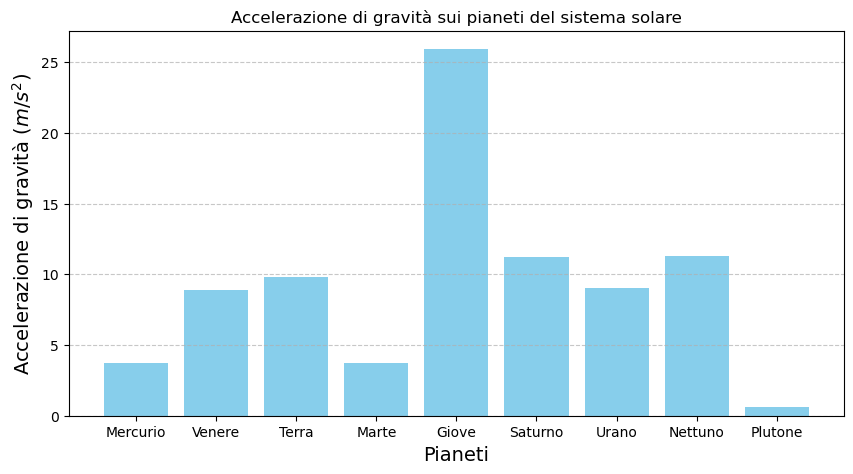

+-----------+--------------+--------------+------------+
| Pianeta   |   Massa (kg) |   Raggio (m) |   g (m/s²) |
+===========+==============+==============+============+
| Mercurio  |     3.30e+23 |     2.44e+06 |   3.70e+00 |
+-----------+--------------+--------------+------------+
| Venere    |     4.87e+24 |     6.05e+06 |   8.87e+00 |
+-----------+--------------+--------------+------------+
| Terra     |     5.97e+24 |     6.37e+06 |   9.82e+00 |
+-----------+--------------+--------------+------------+
| Marte     |     6.42e+23 |     3.39e+06 |   3.73e+00 |
+-----------+--------------+--------------+------------+
| Giove     |     1.90e+27 |     6.99e+07 |   2.59e+01 |
+-----------+--------------+--------------+------------+
| Saturno   |     5.68e+26 |     5.82e+07 |   1.12e+01 |
+-----------+--------------+--------------+------------+
| Urano     |     8.68e+25 |     2.54e+07 |   9.01e+00 |
+-----------+--------------+--------------+------------+
| Nettuno   |     1.02e+26 |   

In [153]:
import numpy as np
import matplotlib.pyplot as plt
# La libreria tabulate è utile per una stampa più ordinata quando vogliamo printare una tabella
from tabulate import tabulate

def calcola_gravita(raggi, masse, nomi_pianeti):
    """
    Calcola l'accelerazione di gravità per una lista di pianeti.
    
    Parametri:
        raggi (array): array dei raggi dei pianeti in metri.
        masse (array): array delle masse dei pianeti in kg.
        nomi_pianeti (array): array con i nomi dei pianeti.
    """
    G = 6.67430e-11  # Costante gravitazionale in m^3/kg/s^2
    gravita = G * masse / (raggi ** 2)  # Formula per l'accelerazione di gravità
    
    # Creazione del grafico
    plt.figure(figsize=(10, 5))
    plt.bar(nomi_pianeti, gravita, color='skyblue')
    plt.xlabel("Pianeti", fontsize=14)
    plt.ylabel("Accelerazione di gravità ($m/s^2$)", fontsize=14)
    plt.title("Accelerazione di gravità sui pianeti del sistema solare")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    return gravita

# Esempio di utilizzo
dati_raggi_km = np.array([
    2439.7,  # Mercurio
    6051.8,  # Venere
    6371.0,  # Terra
    3389.5,  # Marte
    69911,   # Giove
    58232,   # Saturno
    25362,   # Urano
    24622,   # Nettuno
    1188     # Plutone (considerato un pianeta nano)
])  # Raggi in chilometri

# Conversione dei raggi in metri   
dati_raggi_m = dati_raggi_km * 1000

dati_masse = np.array([
    3.3011e23,  # Mercurio
    4.8675e24,  # Venere
    5.9724e24,  # Terra
    6.4171e23,  # Marte
    1.8982e27,  # Giove
    5.6834e26,  # Saturno
    8.6810e25,  # Urano
    1.02413e26, # Nettuno
    1.303e22    # Plutone (considerato un pianeta nano)
])  # Masse in kg

nomi = [
    "Mercurio",
    "Venere",
    "Terra",
    "Marte",
    "Giove",
    "Saturno",
    "Urano",
    "Nettuno",
    "Plutone"
]

accelerazioni = calcola_gravita(dati_raggi_m, dati_masse, nomi)

# Creazione tabella per stampa formattata
tabella = zip(nomi, dati_masse, dati_raggi_m, accelerazioni)
intestazioni = ["Pianeta", "Massa (kg)", "Raggio (m)", "g (m/s²)"]

# Stampa tabella
print(tabulate(tabella, headers=intestazioni, tablefmt="grid", floatfmt=".2e"))

## Moto in una dimesnione
**La cinematica** è una parte della meccanica classica che descrive il movimento in termini di spazio e tempo, **ignorando le cause del movimento**. In questa sezione, ci concentreremo solo sul movimento in una dimensione, definendo posizione, spostamento, velocità e accelerazione. 

Generalmente il movimento può essere suddiviso in tre categorie: traslazionale (come un'auto su una strada), rotazionale (come la rotazione della Terra) e vibratorio (come un pendolo). In questa sezione ci concentriamo solo sul movimento traslazionale, mentre il movimento rotazionale e vibratorio verranno trattati più avanti.

### Esercizio 1 - Distanza percorsa da un'auto con velocità variabile
Un'auto parte da ferma e accelera a 2 $m\;s^{-2}$
per 10 secondi, poi mantiene la velocità costante per 5 secondi e infine frena con decelerazione di 
-3 $m\;s^{-2}$ fino a fermarsi. Qual è la distanza totale percorsa?

#### **Soluzione**  

<details>
  <summary> Mostra la Soluzione</summary>

Per risolvere questo problema, possiamo suddividere il moto in tre fasi e risolvere le eqazioni del moto separatamente in ciascuna fase e poi sommare le distanze percorse nelle varie fasi per ottenere quella totale.

##### **1. Calcolo della velocità**  
- **Fase 1 (accelerazione)**:  
  $$
  v_1 = v_0 + a t = 0 + (2 \times 10) = 20 \, \text{m/s}
  $$  
- **Fase 2 (velocità costante)**:  
  $$
  v_2 = 20 \, \text{m/s}
  $$
- **Fase 3 (decelerazione)**:  
  $$
  0 = 20 + (-3 \times t) \Rightarrow t = \frac{20}{3} \approx 6.67 \, \text{s}
  $$

##### **2. Calcolo della distanza percorsa**  
- **Fase 1 (accelerazione)**:  
  $$
  s_1 = v_0 t + \frac{1}{2} a t^2 = 0 + \frac{1}{2} (2 \times 10^2) = 100 \, \text{m}
  $$
- **Fase 2 (velocità costante)**:  
  $$
  s_2 = v t = 20 \times 5 = 100 \, \text{m}
  $$
- **Fase 3 (decelerazione)**:  
  $$
  s_3 = v_2 t + \frac{1}{2} a t^2 = 20 \times \frac{20}{3} + \frac{1}{2} (-3) \left(\frac{20}{3}\right)^2 = 66.67 \, \text{m}
  $$

**Distanza totale percorsa:**  
$$
s_{\text{tot}} = s_1 + s_2 + s_3 = 100 + 100 + 66.67 = 266.67 \, \text{m}
$$  

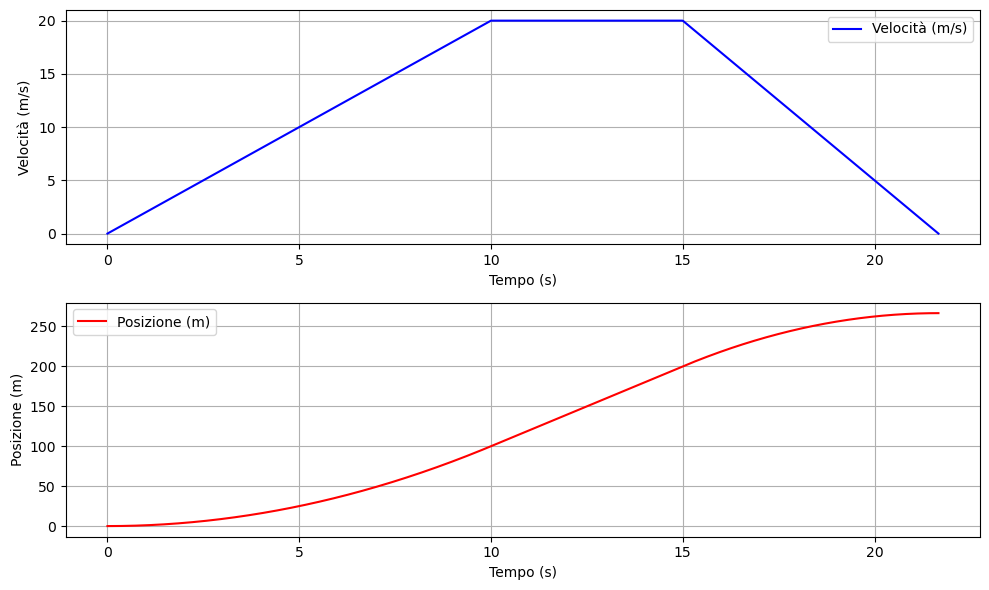

Distanza totale percorsa: 266.67 m


In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Fase 1: Accelerazione
a1 = 2  # accelerazione in m/s^2
t1 = 10  # tempo in secondi
v0 = 0  # velocità iniziale in m/s
v1 = v0 + a1 * t1  # velocità finale (dopo accelerazione)
d1 = v0 * t1 + 0.5 * a1 * t1**2  # distanza percorsa nella fase 1

# Fase 2: Velocità costante
t2 = 5  # tempo in secondi
d2 = v1 * t2  # distanza percorsa nella fase 2

# Fase 3: Decelerazione
a3 = -3  # decelerazione in m/s^2
t3 = v1 / abs(a3)  # tempo per fermarsi
# NOTA:
# La divisione per abs(a3) nella formula per il tempo t3
# serve a garantire che il tempo sia positivo, poiché la decelerazione a3 è negativa.
d3 = v1 * t3 + 0.5 * a3 * t3**2  # distanza percorsa nella fase 3

# Tempo totale e tempo per ciascuna fase
t_total = t1 + t2 + t3
times = np.linspace(0, t_total, 1000)

# Calcolare la posizione e la velocità durante il movimento
positions = []
velocities = []

# NOTA:
# il ciclo for serve a calcolare la posizione e la velocità dell'auto in ogni istante di tempo 
# durante tutto il movimento (nelle tre fasi). Esso è utilizzato per simulare il moto continuo 
# dell'auto, passo per passo, durante l'intero intervallo di tempo da 0 a t_totale, 
# e per generare i grafici della posizione e della velocità in funzione del tempo.
for t in times:
    if t <= t1:  # Fase 1: Accelerazione
        v = v0 + a1 * t
        x = v0 * t + 0.5 * a1 * t**2
    elif t <= t1 + t2:  # Fase 2: Velocità costante
        v = v1
        x = d1 + v * (t - t1)
    else:  # Fase 3: Decelerazione
        t_f = t - t1 - t2
        v = v1 + a3 * t_f
        x = d1 + d2 + v1 * t_f + 0.5 * a3 * t_f**2
    
    positions.append(x)
    velocities.append(v)

# Plot velocità nel tempo
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(times, velocities, label='Velocità (m/s)', color='b')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità (m/s)')
plt.grid(True)
plt.legend()

# Plot posizione nel tempo
plt.subplot(2, 1, 2)
plt.plot(times, positions, label='Posizione (m)', color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('Posizione (m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Distanza totale percorsa
print(f"Distanza totale percorsa: {d1 + d2 + d3:.2f} m")



### Esercizio 2 - È possibile "misurare" una altezza con un cronometro?!?!?!    

#### Soluzione

<details>
  <summary> Mostra la Soluzione</summary>
    
Diciamo di si..... È possibile dedurre un'altezza misurando il tempo di caduta di un oggetto,
di fatto un corpo che cade si muove di moto rettilineo uniformemente accelerato. 
Supponiamo di lasciar cadere un oggetto da fermo, il tempo $t$ che impiega l'oggetto a raggiungere il suolo     è legato all'altezza $H$ da cui è caduto mediante la relazione relazione:
 
  $$
  H = \frac{1}{2}g t^2.
  $$  

In [225]:
import math

# Accelerazione di gravità (in m/s^2)
g = 9.81

def compute_height(fall_time):
    """
    Calcola l'altezza in metri a partire dal tempo di caduta (in secondi).
    
    Args:
        fall_time (float): tempo di caduta in secondi.
    
    Returns:
        float: altezza in metri.
    """
    return 0.5 * g * fall_time**2

# Esempio: tempi di caduta misurati per ciascuna struttura (in secondi)
# Nota: i seguenti valori sono esempi. Sostituisci questi tempi con quelli reali misurati.

# Torre di Pisa
# Tempo di caduta teorico: t ≈ 3.38 s
fall_time_pisa = 3.38

# Torre Eiffel
# Tempo di caduta teorico: t ≈ 7.82 s
fall_time_eiffel = 7.82

# Pilone del ponte di Calatrava
# Tempo di caduta teorico: t ≈ 4.61 s
fall_time_calatrava = 4.61

# Calcolo delle altezze
height_pisa = compute_height(fall_time_pisa)
height_eiffel = compute_height(fall_time_eiffel)
height_calatrava = compute_height(fall_time_calatrava)

# Stampa dei risultati
print("Altezza della Torre di Pisa: {:.2f} m".format(height_pisa))
print("Altezza della Torre Eiffel: {:.2f} m".format(height_eiffel))
print("Altezza del pilone del ponte di Calatrava: {:.2f} m".format(height_calatrava))


Altezza della Torre di Pisa: 56.04 m
Altezza della Torre Eiffel: 299.95 m
Altezza del pilone del ponte di Calatrava: 104.24 m


### Esercizio - 3 Inseguimento tra due veicoli
Un'auto viaggia a 90 km/h in un centro abitato. Dopo aver transitato nel centro abitato per un tempo di 10 secondi viene intercettata da una pattuglia della stradale che parte all'inseguimento da ferma.
Se l'auto della polizia si lancia all'inseguimento con una accelerazione di 2 m/s${^2}$ dopo quanto tempo e dopo quanti metri di inseguimento raggiunge la prima auto?

#### Soluzione

<details>
  <summary> Mostra la Soluzione</summary>

1. **Convertire la velocità dell'auto da km/h a m/s:**
   La velocità dell'auto in metri al secondo è data dalla formula:
   $$
   v_{auto} = 90 \, \text{km/h} = \frac{90 \times 1000}{3600} = 25 \, \text{m/s}
   $$

2. **Equazione del moto dell'auto in movimento:**
   Poiché l'auto si muove con velocità costante, la sua posizione $x_{auto}(t)$ al tempo $t$ (partendo da $t=0$ quando la polizia inizia l'inseguimento) è:
   $$
   x_{auto}(t) = v_{auto} \cdot (t + t_0)
   $$
   Dove:
   - $t_0 = 10 \, \text{sec}$ è il tempo che l'auto ha viaggiato prima che la polizia partisse.
   - $t$ è il tempo che passa da quando la polizia inizia l'inseguimento.

3. **Equazione del moto della polizia:**
   La polizia parte da ferma e si muove con accelerazione costante $a_{polizia} = 2 \, \text{m/s}^2$. La sua posizione $x_{polizia}(t)$ al tempo $t$ è descritta dalla legge del moto uniformemente accelerato:
   $$
   x_{polizia}(t) = \frac{1}{2} a_{polizia} \cdot t^2
   $$

4. **Condizione per il raggiungimento:**
   La polizia raggiunge l'auto quando le loro posizioni sono uguali:
   $$
   x_{auto}(t) = x_{polizia}(t)
   $$

   Sostituendo le espressioni precedenti per le posizioni, otteniamo:
   $$
   25 \cdot (t + 10) = \frac{1}{2} \cdot 2 \cdot t^2
   $$

5. **Risoluzione dell'equazione quadratica:**

   L'equazione da risolvere è:
   $$
   25 \cdot (t + 10) = t^2
   $$

   Riscriviamola in forma standard:
   $$
   t^2 - 25t - 250 = 0
   $$

   Questa è un'equazione quadratica che possiamo risolvere utilizzando la formula risolutiva delle equazioni quadratiche:
   $$
   t = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
   $$

   Dove $a = 1$, $b = -25$, e $c = -250$.

6. **Calcolo delle soluzioni:**

   Calcoliamo il discriminante:
   $$
   \Delta = b^2 - 4ac = (-25)^2 - 4 \cdot 1 \cdot (-250) = 625 + 1000 = 1625
   $$

   Ora calcoliamo le due soluzioni per $t$:
   $$
   t = \frac{-(-25) \pm \sqrt{1625}}{2 \cdot 1} = \frac{25 \pm 40.311}{2}
   $$

   Le due soluzioni sono:
   $$
   t_1 = \frac{25 + 40.311}{2} = 32.655 \, \text{sec}
   $$
   $$
   t_2 = \frac{25 - 40.311}{2} = -7.655 \, \text{sec}
   $$

   Poiché il tempo non può essere negativo, scartiamo la soluzione $t_2$ e prendiamo $t_1 = 32.655 \, \text{sec}$.

7. **Calcolo della distanza percorsa dalla polizia:**

   La distanza percorsa dalla polizia al tempo $t = 32.655 \, \text{sec}$ è data da:
   $$
   x_{polizia}(t) = \frac{1}{2} a_{polizia} \cdot t^2 = \frac{1}{2} \cdot 2 \cdot (32.655)^2
   $$

   Calcoliamo il valore:
   $$
   x_{polizia}(32.655) = (32.655)^2 = 1065.47 \, \text{m}
   $$

   Quindi la polizia raggiunge l'auto dopo circa $32.655 \, \text{sec}$ e percorrendo una distanza di $1065.47 \, \text{m}$.

#### Risultato finale:
- Tempo in cui la polizia raggiunge l'auto: $32.655 \, \text{sec}$
- Distanza percorsa dalla polizia: $1065.47 \, \text{m}$    
    
</details>

<details>
  <summary> Implementazione numerica </summary>

Le equazioni che descrivono il moto dell'auto e della polizia sono:

1. **Posizione dell'auto:**
   $$
   x_{\text{auto}}(t) = v_{\text{auto}} \cdot (t + t_0)
   $$
   dove $v_{\text{auto}}$ è la velocità costante dell'auto e $t_0$ è il tempo che l'auto ha già percorso prima dell'inizio del nostro calcolo.

2. **Posizione della polizia:**
   La polizia parte da ferma e accelera con un'accelerazione costante $a_{\text{polizia}}$. La velocità della polizia in ogni istante $t$ è descritta dall'equazione:
   $$
   v_{\text{polizia}}(t) = v_{\text{polizia}}(t-1) + a_{\text{polizia}} \cdot \Delta t
   $$
   dove $\Delta t$ è il passo temporale e $v_{\text{polizia}}(t-1)$ è la velocità della polizia nel passo temporale precedente.

   La posizione della polizia è quindi:
   $$
   x_{\text{polizia}}(t) = x_{\text{polizia}}(t-1) + v_{\text{polizia}}(t-1) \cdot \Delta t
   $$
   dove $x_{\text{polizia}}(t-1)$ è la posizione della polizia nel passo temporale precedente.

#### Passi del metodo di Eulero

1. **Inizializzazione:**
   - $x_{\text{auto}}(t_0)$ è dato dalla posizione iniziale dell'auto (calcolata come $v_{\text{auto}} \cdot t_0$).
   - $x_{\text{polizia}}(0) = 0$ (la polizia parte da ferma).
   - $v_{\text{polizia}}(0) = 0$ (la polizia parte da ferma).

2. **Iterazione:**
   Per ogni passo temporale $t_n$, con $n \geq 1$:
   - Calcoliamo la velocità della polizia nel passo successivo:
     $$
     v_{\text{polizia}}(t_n) = v_{\text{polizia}}(t_{n-1}) + a_{\text{polizia}} \cdot \Delta t
     $$
   - Calcoliamo la posizione della polizia nel passo successivo:
     $$
     x_{\text{polizia}}(t_n) = x_{\text{polizia}}(t_{n-1}) + v_{\text{polizia}}(t_{n-1}) \cdot \Delta t
     $$
   - La posizione dell'auto è determinata direttamente dalla sua velocità costante:
     $$
     x_{\text{auto}}(t_n) = v_{\text{auto}} \cdot (t_n + t_0)
     $$

3. **Condizione di incontro:**
   L'incontro avviene quando la posizione della polizia supera quella dell'auto, cioè quando:
   $$
   x_{\text{polizia}}(t_n) \geq x_{\text{auto}}(t_n)
   $$
   In questo caso, il tempo di incontro $t_{\text{incontro}}$ è determinato come il primo istante in cui questa condizione è soddisfatta.
    
</details>    

Tempo in cui la polizia raggiunge l'auto (posizioni): 32.66 s
Distanza percorsa dalla polizia: 1066.40 m
Tempo in cui le velocità si intersecano: 12.50 s


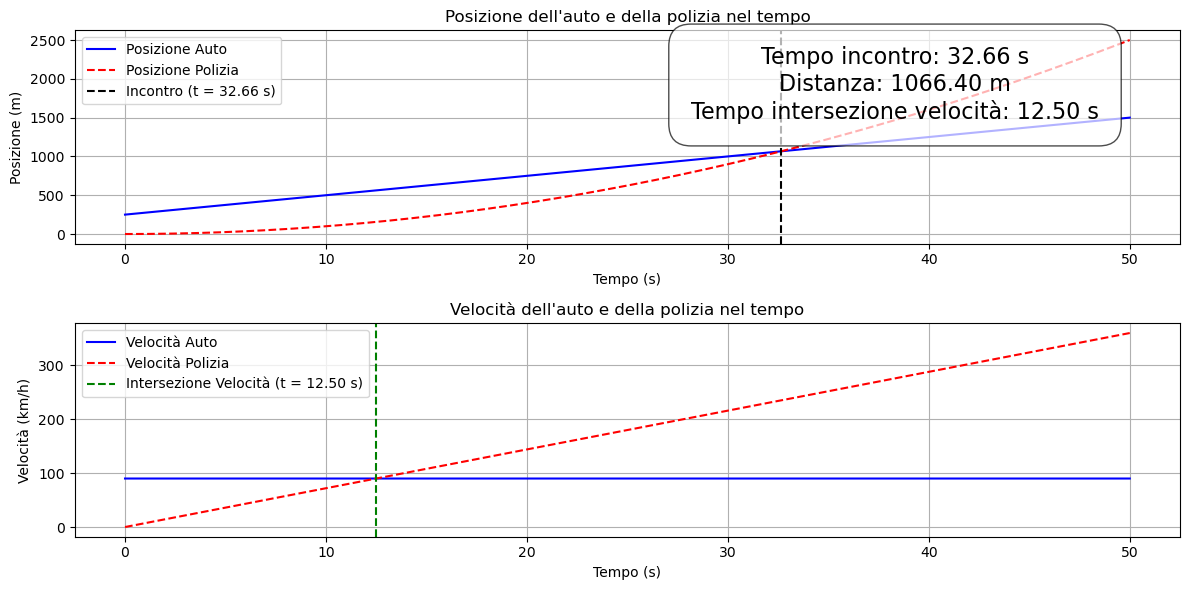

In [270]:
import numpy as np
import matplotlib.pyplot as plt

# Dati
v_auto_km = 90  # velocità in km/h
v_auto = v_auto_km / 3.6  # velocità dell'auto in m/s (90 km/h convertiti in m/s)
a_polizia = 2  # accelerazione della polizia in m/s^2 (minore di 1 ma non zero)
t_0 = 10  # tempo iniziale in cui l'auto ha già viaggiato (in secondi)

# Parametri di simulazione
dt = 0.0001  # passo temporale (in secondi)
t_max = 50  # tempo massimo della simulazione (in secondi)

# Inizializzazione delle variabili
t = np.arange(0, t_max, dt)  # tempo
x_auto = v_auto * (t + t_0)  # posizione dell'auto (in metri)
x_polizia = np.zeros_like(t)  # posizione della polizia (in metri)
v_polizia = np.zeros_like(t)  # velocità della polizia (in m/s)

# Condizione iniziale: la polizia parte da ferma
x_polizia[0] = 0
v_polizia[0] = 0

# Metodo di Eulero per risolvere le equazioni del moto
for i in range(1, len(t)):
    # Aggiornamento della velocità della polizia
    v_polizia[i] = v_polizia[i - 1] + a_polizia * dt
    # Aggiornamento della posizione della polizia
    x_polizia[i] = x_polizia[i - 1] + v_polizia[i - 1] * dt

# Troviamo il tempo di incontro (posizioni uguali)
incontro_indices = np.where(x_polizia >= x_auto)[0]

if len(incontro_indices) > 0:
    t_incontro = t[incontro_indices[0]]
    distanza_incontro = x_polizia[incontro_indices[0]]
else:
    t_incontro = None
    distanza_incontro = None

# Calcolo del tempo in cui le velocità si intersecano
t_vel_intersect = v_auto / a_polizia if a_polizia != 0 else float('inf')  # Per evitare divisioni per zero

# Risultati
if t_incontro is not None:
    print(f"Tempo in cui la polizia raggiunge l'auto (posizioni): {t_incontro:.2f} s")
    print(f"Distanza percorsa dalla polizia: {distanza_incontro:.2f} m")
else:
    print("La polizia non ha raggiunto mai l'auto.")

print(f"Tempo in cui le velocità si intersecano: {t_vel_intersect:.2f} s" if t_vel_intersect != float('inf') else "Velocità della polizia mai intersecata (accelerazione zero)")

# Convertiamo la velocità da m/s a km/h
v_auto_kmh = v_auto * 3.6  # 90 km/h
v_polizia_kmh = v_polizia * 3.6

# Plot
plt.figure(figsize=(12, 6))

# Plot delle posizioni
plt.subplot(2, 1, 1)
plt.plot(t, x_auto, label='Posizione Auto', color='blue')
plt.plot(t, x_polizia, label='Posizione Polizia', color='red', linestyle='--')
if t_incontro is not None:
    plt.axvline(x=t_incontro, color='black', linestyle='--', label=f'Incontro (t = {t_incontro:.2f} s)')
else:
    plt.axvline(x=t_max, color='black', linestyle='none', label='Nessun incontro')
plt.xlabel('Tempo (s)')
plt.ylabel('Posizione (m)')
plt.title('Posizione dell\'auto e della polizia nel tempo')
plt.legend()
plt.grid(True)

# Plot delle velocità
plt.subplot(2, 1, 2)
plt.plot(t, np.full_like(t, v_auto_kmh), label='Velocità Auto', color='blue')
plt.plot(t, v_polizia_kmh, label='Velocità Polizia', color='red', linestyle='--')
plt.axvline(x=t_vel_intersect, color='green', linestyle='--', label=f'Intersezione Velocità (t = {t_vel_intersect:.2f} s)' if t_vel_intersect != float('inf') else "Nessuna intersezione")
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità (km/h)')
plt.title('Velocità dell\'auto e della polizia nel tempo')
plt.legend()
plt.grid(True)

# Aggiungi il box con la distanza percorsa e il tempo di incontro
box_text = f"Tempo incontro: {t_incontro:.2f} s\nDistanza: {distanza_incontro:.2f} m\nTempo intersezione velocità: {t_vel_intersect:.2f} s" if t_incontro is not None else "La polizia non ha raggiunto mai l'auto."
plt.gcf().text(0.75, 0.85, box_text, fontsize=16, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=1'))

plt.tight_layout()
plt.show()


### Esercizio - 4 Velocità di uno tsunami
Uno **Tsunami** può presentarsi come un muro d’acqua che si abbatte sulla costa provocando gravi inondazioni,  oppure come un rapido innalzamento del livello del mare, simile a una marea che cresce rapidamente. 
Con le dovute approssimazioni, il valore della velocità con cui si propagano uno Tsunami è proporzionale 
alla accelerazione di gravità $g$ e all'altezza della colonna d'acqua che si muove, definita come la somma profondità del fluido a riposo $H$ e l'altezza dell'onda $a$ che si propaga sulla superficie dell'acqua.
La relazione che si ricava per la velocità di propagazione è $v=\sqrt{g(H+a)}$. Se il vulcano marsili Marsili, localizzato ad una profondità di circa 3 km e a una distanza di 150 km dalle coste della Calabria, dovesse esplodere creando un'onda alta 500 m dopo quanto tempo lo tsunami raggiungerebbe la costa?

#### Soluzione

<details>
  <summary> Mostra la Soluzione</summary>
    
Per trovare il tempo necessario affinché lo tsunami raggiunga la costa, dobbiamo usare la relazione:

$$
t = \frac{d}{v}
$$

dove:
- $t$ è il tempo che lo tsunami impiega per raggiungere la costa,
- $d$ è la distanza tra il vulcano e la costa, che è di 150 km ($150,000 \, \text{m}$).

#### Calcolo della velocità:

$$
v = \sqrt{9.81 \, \text{m/s}^2 \times (3000 \, \text{m} + 500 \, \text{m})}
$$

$$
v = \sqrt{9.81 \times 3500}
$$

$$
v = \sqrt{34335}
$$

$$
v \approx 185.4 \, \text{m/s}
$$

#### Calcolo del tempo:

$$
t = \frac{150000 \, \text{m}}{185.4 \, \text{m/s}}
$$

$$
t \approx 809.6 \, \text{secondi}
$$

#### Risultato:

Lo tsunami impiegherebbe circa **810 secondi** (che corrispondono a **13 minuti e 30 secondi**) per raggiungere la costa.

### Bonus stage

Scriviamo un semplice programma in python che calcola la posizione e la velocità dello Tsunami in funzione del tempo, e ne fa un grafico.


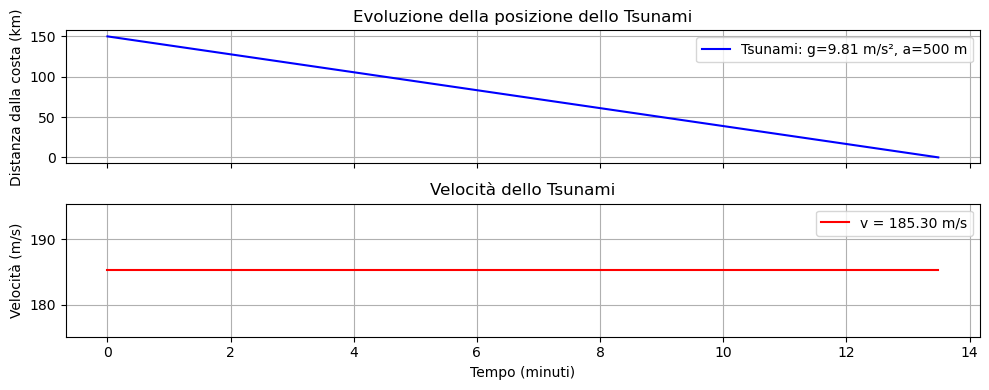

Tempo necessario per lo tsunami per raggiungere la costa: 809.51 secondi
Tempo necessario per lo tsunami per raggiungere la costa: 13.49 minuti


In [272]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione che calcola la velocità dello tsunami e la sua posizione nel tempo
def tsunami_position(g, a, H=3000, d=150000):
    """
    Calcola l'evoluzione della posizione e velocità dello tsunami nel tempo e la grafica.

    Parametri:
    g (float): accelerazione di gravità (in m/s^2)
    a (float): altezza dell'onda (in metri)
    H (float): profondità del mare (in metri), default = 3000 m
    d (float): distanza dalla costa (in metri), default = 150 km
    
    Restituisce:
    None
    """
    # Conversione da metri a chilometri
    d_km = d / 1000  

    # Calcolare la velocità dello tsunami
    v = np.sqrt(g * (H + a))
    
    # Calcolare il tempo totale per arrivare alla costa
    time_to_shore = d / v

    # Creare un array di tempi da 0 a time_to_shore
    t = np.linspace(0, time_to_shore, 1000)  # Tempo in secondi
    
    # Calcolare la posizione dello tsunami in chilometri
    position_km = (d - v * t) / 1000

    # Creazione dei plot
    fig, axes = plt.subplots(2, 1, figsize=(10, 4), tight_layout=True, sharex=True)

    # Plot della posizione
    axes[0].plot(t / 60, position_km, label=f'Tsunami: g={g} m/s², a={a} m', color='b')
    axes[0].set_title('Evoluzione della posizione dello Tsunami')
    axes[0].set_ylabel('Distanza dalla costa (km)')
    axes[0].grid(True)
    axes[0].legend()

    # Plot della velocità (costante nel tempo)
    axes[1].plot(t / 60, np.full_like(t, v), label=f'v = {v:.2f} m/s', color='r')
    axes[1].set_title('Velocità dello Tsunami')
    axes[1].set_xlabel('Tempo (minuti)')
    axes[1].set_ylabel('Velocità (m/s)')
    axes[1].grid(True)
    axes[1].legend()

    plt.show()
    
    # Stampa il tempo necessario per l'onda per raggiungere la costa
    print(f"Tempo necessario per lo tsunami per raggiungere la costa: {time_to_shore:.2f} secondi")
    print(f"Tempo necessario per lo tsunami per raggiungere la costa: {time_to_shore/60:.2f} minuti")

    
# Esempio di utilizzo della funzione
tsunami_position(g=9.81, a=500)


### DLC 1
Scriviamo un semplice programma python per calcolare la posizione dello Tsunami in funzione del tempo e la velocità di propagazione su altri pianeti con diversi valori di $g$

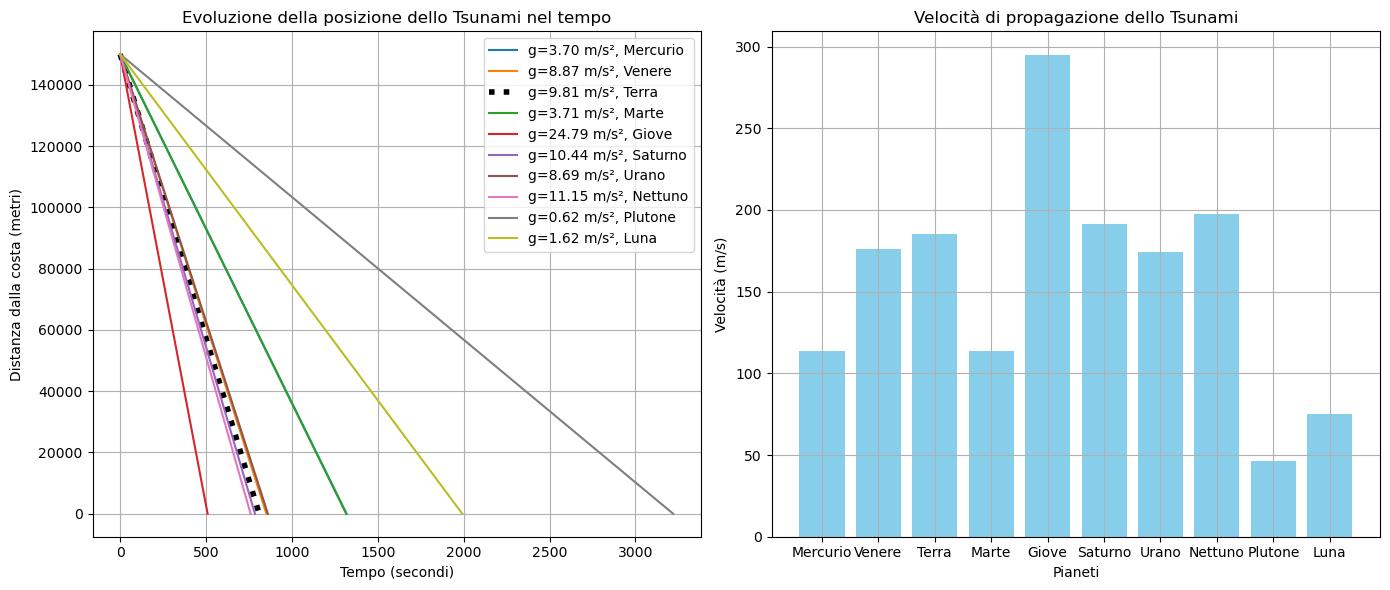

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Dati corretti di accelerazione di gravità per i pianeti del sistema solare (in m/s^2)
g_values = np.array([3.7, 8.87, 9.81, 3.71, 24.79, 10.44, 8.69, 11.15, 0.62, 1.62])  # Mercurio, Venere, Terra, Marte, Giove, Saturno, Urano, Nettuno, Plutone, Luna
planet_names = ['Mercurio', 'Venere', 'Terra', 'Marte', 'Giove', 'Saturno', 'Urano', 'Nettuno', 'Plutone', 'Luna']

# Funzione che calcola l'evoluzione della posizione dello tsunami nel tempo
def tsunami_position(g_values, a_values, H=3000, distance_to_shore=150000):
    """
    Calcola l'evoluzione della posizione dello tsunami nel tempo per diversi valori di g e a e la grafica.
    
    Parametri:
    g_values (array): accelerazione di gravità per diversi pianeti (in m/s^2)
    a_values (array): ampiezza dell'onda (in metri)
    H (float): profondità del mare (in metri), default = 3000 m
    distance_to_shore (float): distanza dalla costa (in metri), default = 150 km
    
    Restituisce:
    None
    """
    # Creare un grafico per l'evoluzione della posizione dello tsunami
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Grafico della posizione dello tsunami nel tempo (sinistra)
    for g, planet in zip(g_values, planet_names):
        for a in a_values:
            # Calcolare la velocità dello tsunami per i valori di g e a
            if g == 0:  # Se g è zero (ad esempio per la Luna), saltiamo questa iterazione
                continue
            v = np.sqrt(g * (H + a))
            
            # Calcolare il tempo totale per arrivare alla costa
            time_to_shore = distance_to_shore / v
            
            # Creare un array di tempi da 0 a time_to_shore
            t = np.linspace(0, time_to_shore, 1000)
            
            # Calcolare la distanza relativa dal punto di partenza alla costa
            position = distance_to_shore - v * t  # la posizione è la distanza totale meno la distanza percorsa
            
            # Tracciare la curva della posizione per la Terra con una linea più spessa, rossa e tratteggiata
            if planet == 'Terra':
                label = f'g={g:.2f} m/s², {planet}'
                ax[0].plot(t, position, linewidth=4, linestyle=':', color='black', label=label)  # Linea spessa e rossa per la Terra, tratteggiata
            else:
                label = f'g={g:.2f} m/s², {planet}'
                ax[0].plot(t, position, label=label)

    ax[0].set_title('Evoluzione della posizione dello Tsunami nel tempo')
    ax[0].set_xlabel('Tempo (secondi)')
    ax[0].set_ylabel('Distanza dalla costa (metri)')
    ax[0].grid(True)
    ax[0].legend()

    # Grafico della velocità di propagazione (destra)
    velocities = np.sqrt(g_values * (H + a_values[0]))  # Solo per un valore di a
    ax[1].bar(planet_names, velocities, color='skyblue')
    ax[1].set_title('Velocità di propagazione dello Tsunami')
    ax[1].set_xlabel('Pianeti')
    ax[1].set_ylabel('Velocità (m/s)')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

# Esempio di utilizzo della funzione
a_values = np.array([500])  # Ampiezze dell'onda (in metri)
tsunami_position(g_values=g_values, a_values=a_values)


### DLC 2
Scriviamo un semplice programma python per calcolare l'evoluzione temporale della posizione dell'onda discretizzando le eqazioni del moto con passi temporali $\Delta t$

### Soluzione

<details>
  <summary> Schema numerico </summary>

**1. Equazioni del Moto**
Lo tsunami si propaga con una velocità approssimata dalla formula:

$$
v = \sqrt{g (H + a)}
$$

dove:
- $g$ è l'accelerazione di gravità (9.81 m/s²),
- $H$ è la profondità dell’oceano (3000 m),
- $a$ è l'ampiezza dell'onda iniziale.

L’equazione del moto dello tsunami segue la relazione differenziale:

$$
\frac{dx}{dt} = - v
$$

poiché lo tsunami si avvicina alla costa, la posizione $x$ diminuisce nel tempo.

**2. Simulazione della Dinamica**
Per determinare l'evoluzione temporale della posizione $x(t)$ e della velocità $v(t)$, utilizziamo una versione discreta dell'equazione del moto con un passo temporale $\Delta t$.
L'equazione del moto è approssimata numericamente utilizzando il limite del rapporto incrementale:

$$
x_{n+1} = x_n - v \cdot \Delta t
$$

dove:
- $x_n$ è la posizione dello tsunami al tempo $t_n$,
- $x_{n+1}$ è la posizione al tempo successivo $t_{n+1} = t_n + \Delta t$,
- $v$ è la velocità, che rimane costante durante la propagazione,
- $\Delta t$ è il passo temporale scelto per la simulazione.

Il calcolo prosegue iterativamente fino a quando lo tsunami raggiunge la costa ($x = 0$).


$$
x_{n+1} = x_n - v \cdot \Delta t
$$

Il calcolo procede iterativamente fino a raggiungere la costa ($x = 0$).

</details>
    
<details>
  <summary> Implementazione </summary>
    
### Definizione iniziale:
- $ x_0 = 0 $ (posizione iniziale dell'onda)
- $ v_0 = \sqrt{g \cdot (H + a)} $ (velocità iniziale)

### Per ogni passo temporale $ i $ (da 1 a $ N_{t} $):

1. **Calcolare la velocità istantanea**:
   $$
   v_i = \sqrt{g \cdot (H_i + a)}
   $$

2. **Calcolare la nuova posizione dell'onda**:
   $$
   x_i = x_{i-1} + v_i \cdot \Delta t
   $$

3. **Memorizzare i risultati**:
   - $ \text{distances}[i] = x_i $ (distanza percorsa dall'onda)
   - $ \text{speeds}[i] = v_i $ (velocità istantanea dell'onda)

Ripetere per tutti i passi temporali.

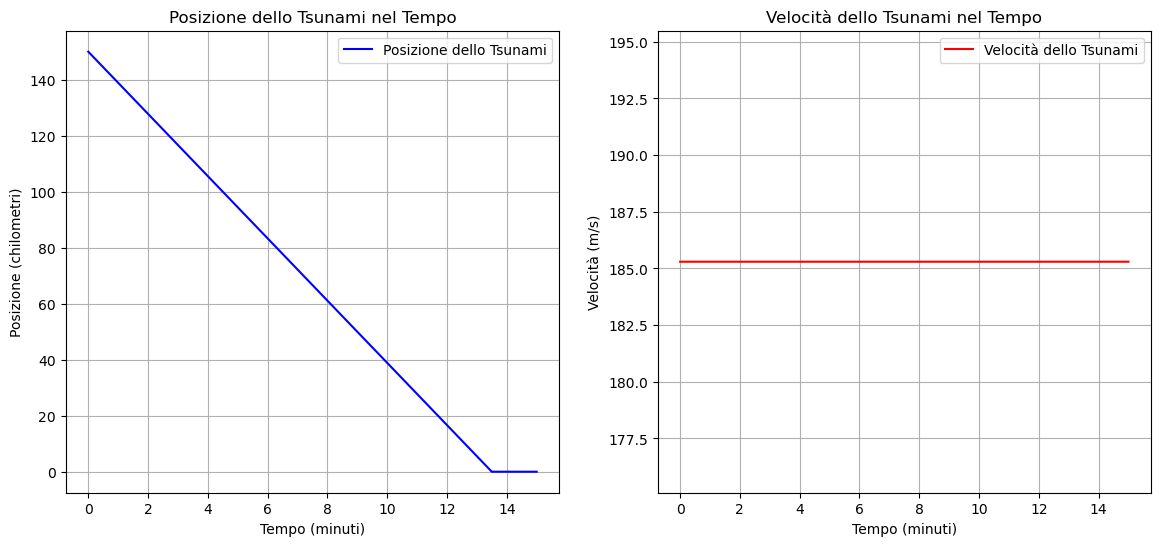

In [249]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
g = 9.81  # Accelerazione di gravità (m/s^2) per la Terra
a = 500  # Ampiezza dell'onda (in metri)
H = 3000  # Profondità costante (in metri)
distance_to_shore = 150000  # Distanza dalla costa in metri (150 km)
time_max = 900  # Tempo massimo per la simulazione (in secondi)
dt = 0.1  # Passo temporale per il metodo di Euler (in secondi)

# Funzione per calcolare la velocità istantanea dello tsunami (velocità costante)
def velocity(H, a):
    return np.sqrt(g * (H + a))  # Velocità istantanea

# Metodo di Eulero per risolvere le equazioni del moto
def euler_method(H, time_max, dt, a, distance_to_shore):
    # Inizializzazione delle variabili
    num_steps = int(time_max / dt)  # Numero di passi temporali
    t_values = np.arange(0, time_max, dt)  # Array di tempi
    x_values = np.zeros(num_steps)  # Posizioni (inizialmente tutte 0)
    v_values = np.zeros(num_steps)  # Velocità (inizialmente tutte 0)
    
    # Calcolare la velocità costante
    v = velocity(H, a)
    
    # Posizione iniziale
    x_values[0] = distance_to_shore / 1000  # Convertito in chilometri
    
    # Iterazione con il metodo di Euler
    for i in range(1, num_steps):
        # Aggiornare la posizione con il metodo di Euler
        x_values[i] = x_values[i-1] - v * dt / 1000  # Decresce in chilometri
        v_values[i] = v  # Velocità costante
        
        if x_values[i] <= 0:
            x_values[i] = 0
    
    return t_values, x_values, v_values

# Risoluzione con il metodo di Euler
t_values, x_values, v_values = euler_method(H, time_max, dt, a, distance_to_shore)

# Conversione delle unità in minuti
t_values_minutes = t_values / 60  # Convertire il tempo in minuti

# Creazione del grafico con 2 subplot affiancati
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Primo plot: Posizione vs Tempo
axs[0].plot(t_values_minutes, x_values, label="Posizione dello Tsunami", color='b')
axs[0].set_title('Posizione dello Tsunami nel Tempo')
axs[0].set_xlabel('Tempo (minuti)')
axs[0].set_ylabel('Posizione (chilometri)')
axs[0].grid(True)
axs[0].legend()

# Secondo plot: Velocità vs Tempo
axs[1].plot(t_values_minutes[1:np.size(v_values)], v_values[1:np.size(v_values)], label="Velocità dello Tsunami", color='r')
axs[1].set_title('Velocità dello Tsunami nel Tempo')
axs[1].set_xlabel('Tempo (minuti)')
axs[1].set_ylabel('Velocità (m/s)')
axs[1].grid(True)
axs[1].legend()


### DLC 3
Modifichiamo il programma precedente per tener conto della variazione della profondità del mare man mano che che l'onda si avvicina alla costa.

### Come cambia la velocità con la profondità man mano che ci avviciniamo alla costa?

Nella simulazione dello tsunami, la variazione della profondità dell'acqua viene aggiornata in ogni passo temporale. La profondità dell'acqua cambia in relazione alla velocità di propagazione dell'onda, in quanto l'onda stessa modifica la distribuzione della massa d'acqua.

<details>
  <summary> Implementazione numerica </summary>

La variazione della profondità dell'acqua viene calcolata sulla base della velocità dell'onda. In particolare, la profondità dell'acqua $H$ diminuisce proporzionalmente alla velocità dell'onda nel tempo.

Partendo dalla definizione di velocità $[v] = [L][t^{-1}]$ approssimiamo la variazione di profondità la $\Delta H$ che l'onda sperimenta durante la sua propagazione come:

$$
\Delta H = \frac{v \cdot \Delta t}{1000}
$$

Dove:
- $ \Delta H $ è la variazione di profondità (in metri),
- $ v $ è la velocità dell'onda (in m/s),
- $ \Delta t $ è il passo temporale (in secondi),
- Il fattore di divisione per 1000 è utilizzato per adattare l'unità di misura in metri.

La profondità dell'acqua viene poi aggiornata ad ogni passo temporale in base a questa variazione:

$$
H_i = \max(H_{\text{final}}, H_i - \Delta H)
$$

Dove:
- $ H_i $ è la profondità che l'onda sente al tempo $ t $,
- $ H_{\text{final}} $ è una profondità finale minima (un valore di soglia per evitare che la profondità diventi negativa),
- $ \Delta H $ è la variazione calcolata precedentemente.

#### Algoritmo per la soluzione numerica dell'equazione

Durante ogni iterazione, la variazione di profondità viene calcolata e la profondità dell'acqua viene aggiornata, con i seguenti passaggi:

**Calcolo della velocità istantanea**: La velocità $ v $ viene calcolata tramite la formula:
   $$
   v = \sqrt{g \cdot (H + a)}
   $$
   Dove:
   - $ g $ è l'accelerazione di gravità (9.81 m/s$^2$),
   - $ H $ è la profondità dell'acqua,
   - $ a $ è l'ampiezza dell'onda.

**Calcolo della variazione di profondità**: 
   La variazione della profondità $ \Delta H $ viene calcolata utilizzando la velocità $ v $ e il passo temporale $ \Delta t $.

**Aggiornamento della profondità**: La nuova profondità $ H_i $ viene calcolata tenendo conto della variazione $ \Delta H $ e del valore minimo $ H_{\text{final}} $ per evitare profondità negative.

</details>      
    
<details>
  <summary>Codice per il calcolo con la variazione di Profondità</summary>

##### Calcolare la velocità dell'onda
v = np.sqrt(g * (current_H + a)) 

##### Calcolare la variazione di profondità
delta_H = v * dt / 1000

##### Aggiornare la profondità
current_H = max(H_final, current_H - delta_H)

</details>    

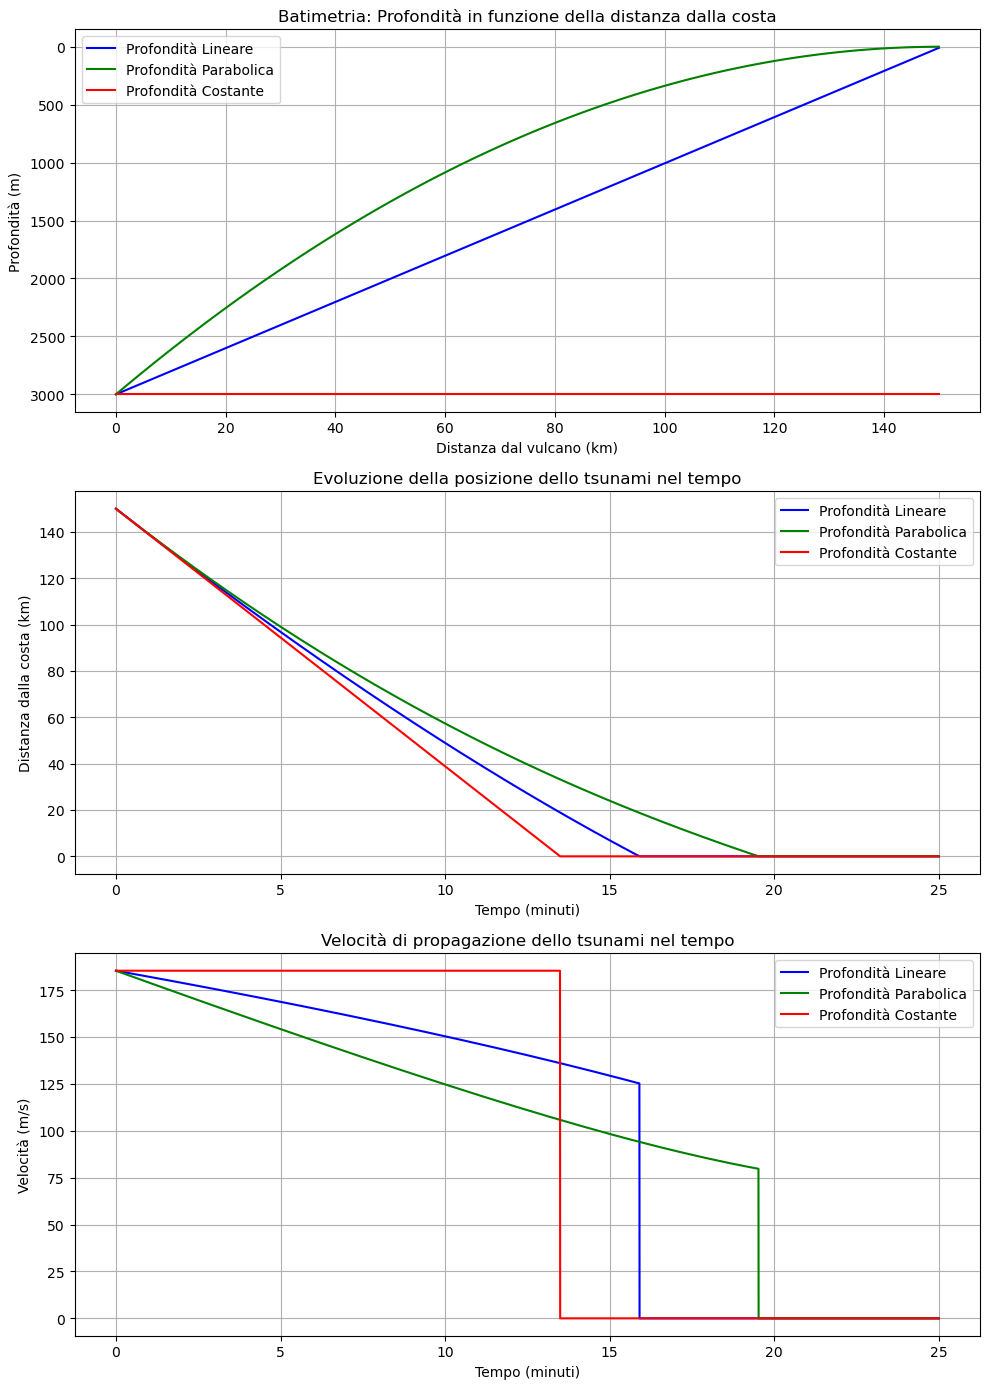

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def tsunami_propagation(g, H_values, delta_t=0.1, final_time=6000, a=500, H_final=10):
    """
    Simula la propagazione di uno tsunami calcolando posizione e velocità nel tempo.
    """
    
    # Inizializzare variabili
    times = [0]  
    distances = [distance_to_shore]  
    speeds = []  
    current_H = H_values[0]  
    distance_remaining = distance_to_shore  
    
    # Calcolare il numero totale di passi temporali
    total_steps = int(final_time / delta_t)
    
    for i in range(1, total_steps + 1):
        # Calcolare la velocità istantanea
        v = np.sqrt(g * (current_H + a))  

        # Interpolazione di H
        current_H = np.interp(i * delta_t, np.linspace(0, total_steps * delta_t, len(H_values)), H_values)

        # Aggiornare la profondità
        delta_H = v * delta_t / 1000  
        current_H = max(H_final, current_H - delta_H)  

        # Aggiornare la distanza residua
        distance_remaining -= v * delta_t  
        
        if distance_remaining < 0:
            distance_remaining = 0
            v = 0  

        # Salvare i risultati
        times.append(times[-1] + delta_t)
        distances.append(distance_remaining)  
        speeds.append(v)  
    
    # Convertire i tempi in minuti e distanze in km
    times_in_minutes = np.array(times) / 60
    return times_in_minutes, np.array(distances) / 1000, np.array(speeds)  

# Parametri fisici
g = 9.81  
distance_to_shore = 150000  

# Definizione delle batimetrie
x_values = np.linspace(0, distance_to_shore, 100) / 1000  # distanza dalla costa in km
H_linear = np.linspace(3000, 10, 100)
H_parabolic = (np.linspace(3000, 10, 100) ** 2) / 3000  
H_constant = np.full(100, 3000)

# Simulazioni
Tf = 1500  
times_linear, distances_linear, speeds_linear = tsunami_propagation(g, H_linear, final_time=Tf)
times_parabolic, distances_parabolic, speeds_parabolic = tsunami_propagation(g, H_parabolic, final_time=Tf)
times_constant, distances_constant, speeds_constant = tsunami_propagation(g, H_constant, final_time=Tf)

# Creazione della figura con 3 subplot
fig, axs = plt.subplots(3, 1, figsize=(10, 14))

# 1° subplot: Batimetria
axs[0].plot(x_values, H_linear, label="Profondità Lineare", color='b')
axs[0].plot(x_values, H_parabolic, label="Profondità Parabolica", color='g')
axs[0].plot(x_values, H_constant, label="Profondità Costante", color='r')

axs[0].set_title('Batimetria: Profondità in funzione della distanza dalla costa')
axs[0].set_xlabel('Distanza dal vulcano (km)')
axs[0].set_ylabel('Profondità (m)')
axs[0].invert_yaxis()  # Invertire asse Y per rappresentare il fondale correttamente
axs[0].grid(True)
axs[0].legend()

# 2° subplot: Posizione dello tsunami nel tempo
axs[1].plot(times_linear, distances_linear, label="Profondità Lineare", color='b')
axs[1].plot(times_parabolic, distances_parabolic, label="Profondità Parabolica", color='g')
axs[1].plot(times_constant, distances_constant, label="Profondità Costante", color='r')

axs[1].set_title('Evoluzione della posizione dello tsunami nel tempo')
axs[1].set_xlabel('Tempo (minuti)')
axs[1].set_ylabel('Distanza dalla costa (km)')
axs[1].grid(True)
axs[1].legend()

# 3° subplot: Velocità di propagazione nel tempo
axs[2].plot(times_linear[:-1], speeds_linear, label="Profondità Lineare", color='b')
axs[2].plot(times_parabolic[:-1], speeds_parabolic, label="Profondità Parabolica", color='g')
axs[2].plot(times_constant[:-1], speeds_constant, label="Profondità Costante", color='r')

axs[2].set_title('Velocità di propagazione dello tsunami nel tempo')
axs[2].set_xlabel('Tempo (minuti)')
axs[2].set_ylabel('Velocità (m/s)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()
